In [9]:
from scipy.stats import norm 
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab
import numpy as np 
from scipy import stats
import math
import time
%matplotlib inline
plt.rcParams["figure.figsize"] = [15,10]

from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import math

%matplotlib inline


In [2]:
beta = 0.5

# Example of [1,2,2,3,4]
def HRM(v, N):
    #print()
    #print("v", v)
    #print('len(v)', len(v))
    # Step 2
    # If we only have 1 or 2 values, just return their mean
    if N == 1 or N == 2:
        return v.mean()
    
    # Step 3
    # calculate the interval width, this method gets it's name
    # with a Beta of 0.5 or half-width.  Other Beta values can
    # be used for different effects
    # This is half the width of the full range of data
    w = beta*(v[-1]-v[0])

    #print("w", w)
    # Step 4
    # Create N-1 intervals called I
    # each interval is of w width
    I=[]
    for j in range(0, N-1): # j = 1 to N-1, paper is 1 based index
        I.append((v[j], v[j]+w) )
    I = np.array(I)
    
    #print('I', I)
    #print('len I', len(I))
    
    # Step 4.5
    # for each interval, determine how many values are in each interval
    cnt = np.array([((rng[0] <= v) & (v <= rng[1])).sum() for rng in I])
    N_prime = max(cnt)
    #print('cnt', cnt)
    #print('len(cnt)', len(cnt))
    #print("N_prime", N_prime)
    
    # Step 5
    if (cnt == N_prime).sum() == 1:
        J = I[np.where(cnt == N_prime)[0][0]]
        v = v[np.logical_and(v>=J[0], v<=J[1])]
        return HRM(v, len(v))
        
        
    # Step 6
    IJ = []
    for Ii in I[cnt==N_prime]:
        IJ.append(v[(Ii[0]<=v) & (v<=Ii[1])])
        
    # Step 7
    w_prime = np.ptp(IJ, axis=1).min()
    
    # Step 8
    Vmin = v[-1] # default to our array's min/max
    Vmax = v[0]
    for IJi in IJ:
        if (IJi[-1]-IJi[0]) == w_prime:
            if (IJi[0]<Vmin): Vmin = IJi[0]
            if (IJi[-1]>Vmax): Vmax = IJi[-1]
    
    # Step 9
    min_index = np.argmax(v==Vmin)
    v_back = v[::-1]
    max_index = len(v)-np.argmax(v_back==Vmax)-1
    N_prime_prime = max_index-min_index+1
    
    # Step 10
    v = v[min_index:max_index+1]
    
    # Step 11
    if N == N_prime_prime:
        # this should not happen for continous data, but regardless we need to have a case for it
        # Essentially this means that we did not progress this itteration
        if (v[2]-v[1]) < (v[-1]-v[-2]):
            v = v[:-1]
            N_prime_prime = N_prime_prime - 1
        elif (v[2]-v[1]) > (v[-1]-v[-2]):
            v = v[1:]
            N_prime_prime = N_prime_prime - 1
        else:
            v = v[1:-1]
            N_prime_prime = N_prime_prime - 2
            
    # Step 12
    N = N_prime_prime
    return HRM(v, N)
    
    

In [61]:
def graph(modal, numBins, title):
    count, bins, ignored = plt.hist(modal, numBins)
    modal.sort()
    hrm = HRM(modal, len(modal))
    mean=modal.mean()
    median=modal.median()
    handles=[]
    handles.append(plt.axvline(x=hrm, color='fuchsia', label='Half-Range: {0:.2f}'.format(hrm)))
    handles.append(plt.axvline(x=mean, color='y', label='Mean: {0:.2f}'.format(mean))
    handles.append(plt.axvline(x=median, color='g', label='Median: {0:.2f}'.format(medial)))
    plt.legend(handles=handles)
    plt.title(title, {'fontsize': 20})
    plt.show()

SyntaxError: invalid syntax (<ipython-input-61-6b1693a44281>, line 10)

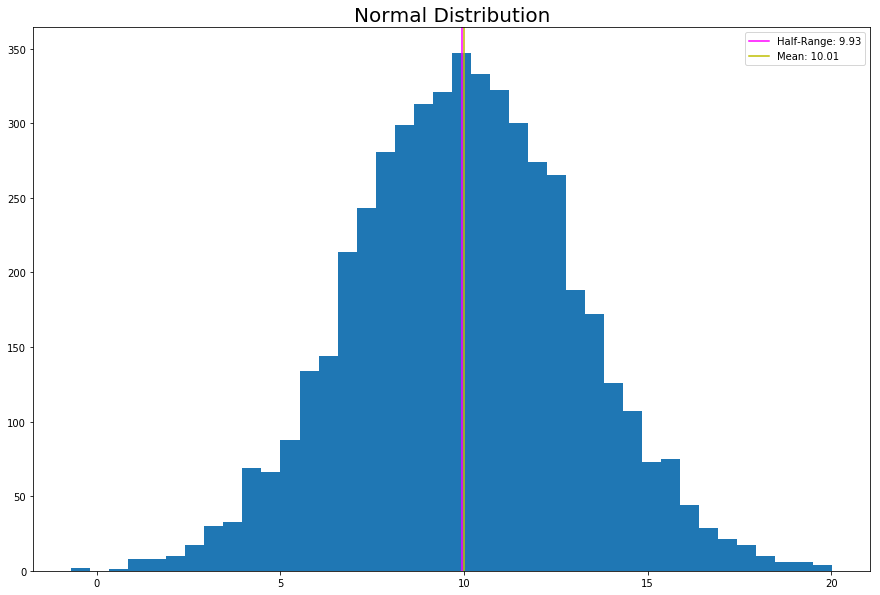

In [57]:
modal = np.random.normal(10, 3, 5000)
graph(modal, 40, 'Normal Distribution')

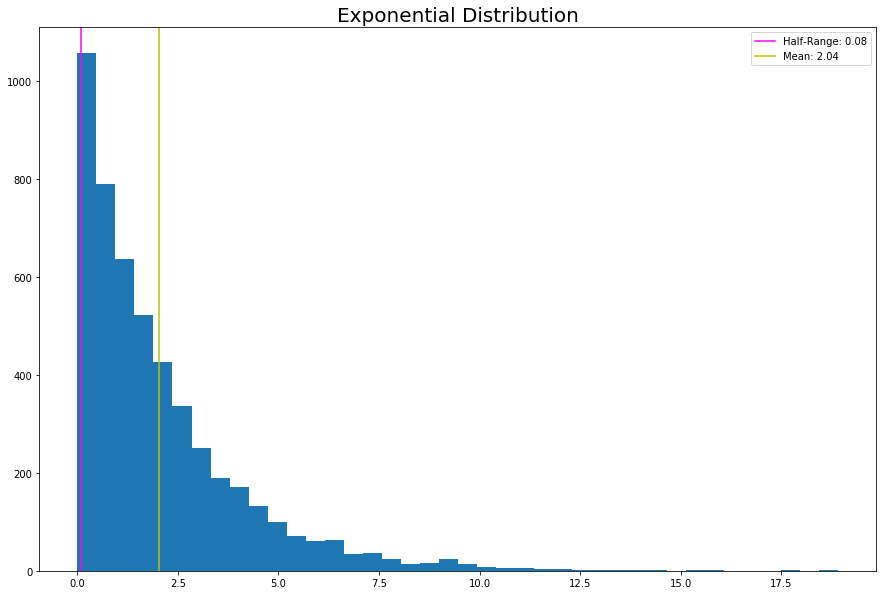

In [58]:
modal = np.random.exponential(2, 5000)
graph(modal, 40, 'Exponential Distribution')

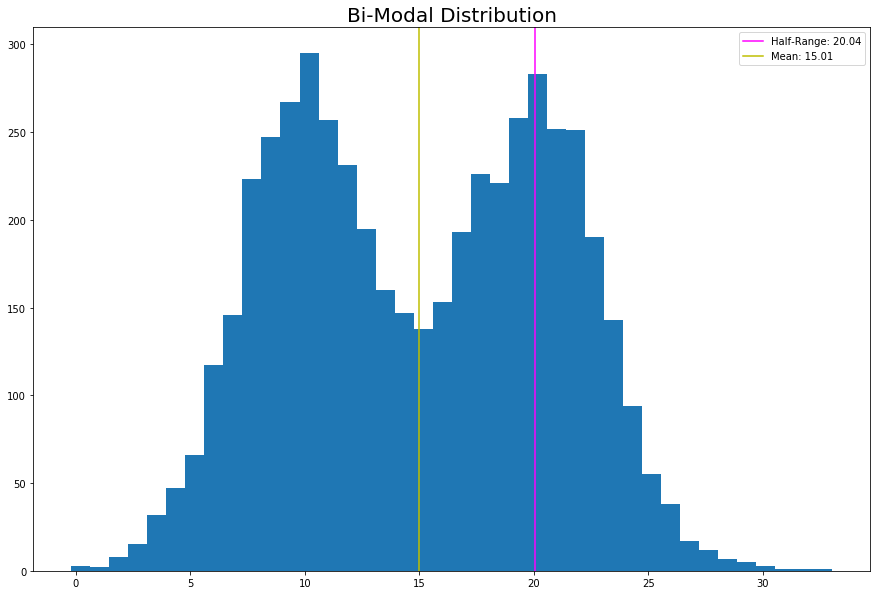

In [59]:
modal1 = np.random.normal(10, 3, 2500)
modal2 = np.random.normal(20, 3, 2500)
modal = np.concatenate((modal1, modal2))
graph(modal, 40, 'Bi-Modal Distribution')

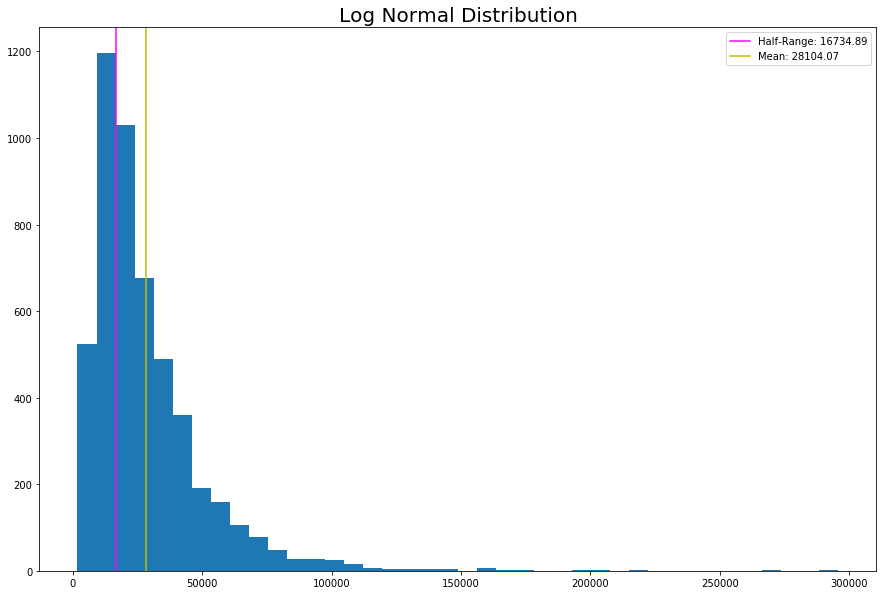

In [60]:
modal = np.random.lognormal(10, 0.7, 5000)
graph(modal, 40, 'Log Normal Distribution')